In [1]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib widget
import matplotlib 
import numpy as np
import pandas as pd
import os, sys, time, pickle
#import ipywidgets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection    

from scipy import optimize
# use LaTeX, choose nice some looking fonts and tweak some settings
matplotlib.rc('font', family='serif')
matplotlib.rc('font', size=16)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('legend', handlelength=1.5)
matplotlib.rc('legend', frameon=True)
matplotlib.rc('xtick.major', pad=7)
matplotlib.rc('xtick.minor', pad=7)
matplotlib.rc('text', usetex=True)
# matplotlib.rc('text.latex', 
#               preamble=[r'\usepackage[T1]{fontenc}',
#                         r'\usepackage{amsmath}',
#                         r'\usepackage{txfonts}',
#                         r'\usepackage{textcomp}'])

matplotlib.rc('figure', figsize=(12, 9))

#plt.style.use(["default"])


In [8]:
psddatafolder = r"/home/jiyongso/mydocs/psddata/FILTERED"
psddatafolder2 = r"/home/jiyongso/mydocs/psddata"

# psd = pd.read_pickle(os.path.join(psddatafolder, "ch2data_2.pkl"))
# psd.columns=["TimeTag"]+list(np.arange(168))

# # # 앞으로 데이터 해석하는데 필요할 backgroun와  maximum value 를 column으로 채워 넣음.
# bgval = psd.loc[:, 5:35].apply(np.mean, axis=1)
# bgstd = psd.loc[:, 5:35].apply(np.std, axis=1)
# psd.insert(loc=1, column = "BgVal", value=bgval)
# psd.insert(loc=2, column = "BgStd", value=bgstd)
# psd.insert(loc=3, column = "MaxIndex", value=psd.loc[:, 0:100].apply(np.argmax, axis=1))
# psd.insert(loc=4, column = "MaxVal", value = psd.loc[:, 0:100].apply(np.max, axis=1))

# psd.sort_values("MaxVal", ascending=False, inplace=True)

# psd.to_pickle(os.path.join(psddatafolder, "ch2data_3.pkl"))

psd = pd.read_pickle(os.path.join(psddatafolder, "ch2data_3.pkl"))

In [3]:
def smoothstep(x, a, b, c, d):
    return a/(1.0+np.exp(-b*((x-c))))+d

def residual(p, x, y):
    return y-smoothstep(x, p[0], p[1], p[2], p[3])

In [12]:
smoothfitting=pickle.load(open(os.path.join(psddatafolder2, "smoothstepfit.pkl"), "rb"))

In [14]:
smf1=[a[0] for a in smoothfitting]
smf2=[a[1][0] for a in smoothfitting]
smf3=[a[1][1] for a in smoothfitting]
smf = pd.DataFrame(data = smf2, index = smf1, columns = ("a", "b", "c", "d"))
smf.insert(loc = 4, column = "pcov", value = smf3 )

In [53]:
smf2=smf[smf["pcov"]<3]

In [54]:
smf.shape, smf2.shape

((2214847, 5), (2208173, 5))

(-1.2716103834618862, 1.5054796216865107)

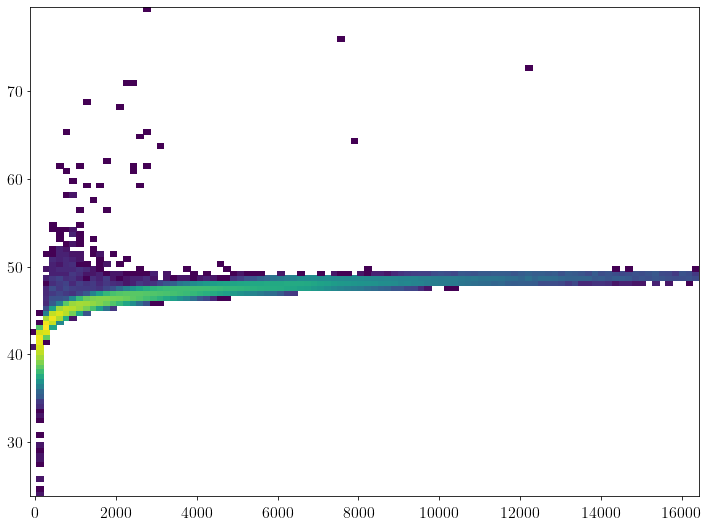

In [60]:
plt.hist2d(smf2["a"], smf2["c"], bins=[100, 100], norm=matplotlib.colors.LogNorm())
smf2["b"].min(), smf2["b"].max()
#plt.yscale('log')

In [44]:
smf2=smf[smf["pcov"]!=1]

In [46]:
smf2.index

Int64Index([ 923588, 1112146, 1155055,  277712,  150737, 1126010,  600708,
            1876070,  919528,  693995,
            ...
            1269735,  155522, 1786424,  228147,  359768,  278691, 2046000,
            1464023, 2039438,  516436],
           dtype='int64', length=6688)

Text(0.5, 1.0, 'Peak ID= 1112146')

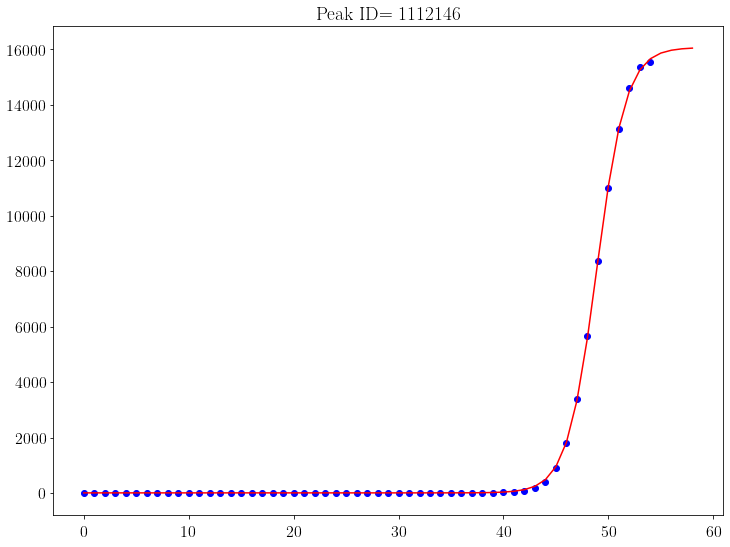

In [50]:
peakid = smf2.index[1]

maxind = psd.loc[peakid]["MaxIndex"]
yy = psd.loc[peakid, 5:int(maxind)]
xx = np.arange(yy.shape[0])
x2 = np.arange(yy.shape[0]+4)
plt.plot(xx, yy, 'bo', label="data ID = "+str(peakid))
popt = smf2.loc[peakid]["a":"d"]
plt.plot(x2, smoothstep(x2, popt[0], popt[1], popt[2], popt[3]), 
              'r-', label="smooth step function, b= %5.3f, c=%5.3f"%(popt[1], popt[2]))
plt.title("Peak ID= %d"%peakid)

In [56]:
smf2

,a,b,c,d,pcov
1860390,16301.094952,0.750537,48.835029,18.211637,1
570282,16361.629514,0.752985,49.400993,17.437039,1
2101019,16327.357913,0.758191,49.183594,18.886747,1
834923,16274.947312,0.703964,48.820684,14.169858,1
1282169,16308.903630,0.717990,48.932323,17.300834,1
...,...,...,...,...,...
736831,107.828309,0.754709,39.448431,16.834286,1
481238,109.968471,0.873253,40.224196,17.453585,1
649223,104.682310,0.825006,38.687430,17.929585,1
815433,99.765151,0.766590,38.185249,18.287050,1


<ipython-input-28-18bfd92f329c>:2: RuntimeWarning: overflow encountered in exp
  return a/(1.0+np.exp(-b*((x-c))))+d


Text(0.5, 1.0, 'Peak ID = 1564216')

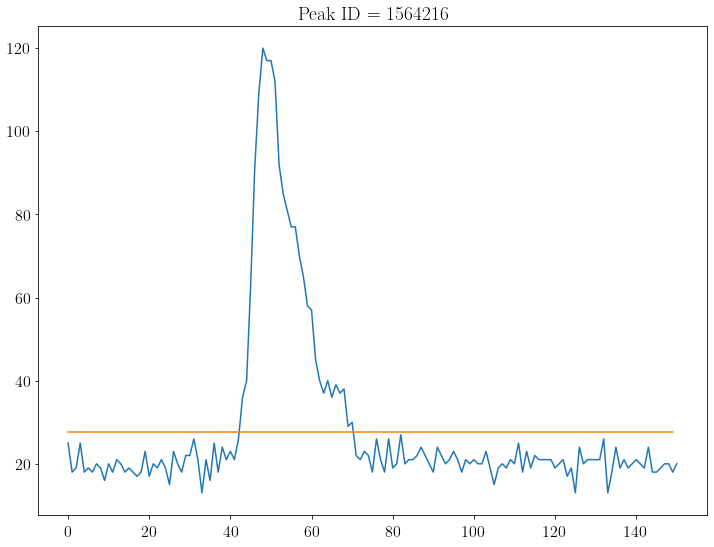

In [78]:
indd=1564216
psd.loc[indd, 0:150].plot()
xx=np.arange(0, 150)
plt.plot(xx, smoothstep(xx-5, smf.at[indd, "a"],smf.at[indd, "b"], smf.at[indd, "c"], smf.at[indd, "d"] ))
plt.title("Peak ID = %d"%indd)

In [69]:
ssm = smf[smf["pcov"]==1]
ssm = ssm[ssm["b"]>0.0]

In [71]:
ssm["b"].max(), ssm["b"].min()

(21.83723173119004, 0.07697669414112662)

Text(0.5, 1.0, 'Peak ID = 1564216')

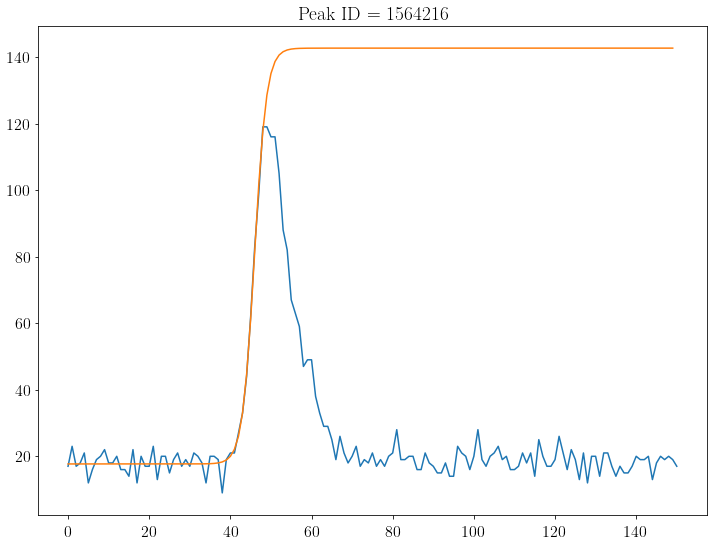

In [81]:
peakid = 1953358
maxind = psd.loc[peakid]["MaxIndex"]
p0 = [15000., 0.6, maxind-5, 2.0]
yy = psd.loc[peakid, 5:int(maxind)]
xx = np.arange(yy.shape[0])
popt, pcov = optimize.leastsq(residual, p0, args=(xx, yy))
psd.loc[peakid, 0:150].plot()
xx=np.arange(0, 150)
plt.plot(xx, smoothstep(xx-5, popt[0], popt[1], popt[2], popt[3]))
plt.title("Peak ID = %d"%indd)

In [74]:
smm = smf[smf["pcov"]!=1]

In [76]:
smm

,a,b,c,d,pcov
570282,16361.629460,0.752985,49.400993,17.437042,3
1147171,16353.449366,0.752827,48.553760,19.023744,3
2182220,16356.024394,0.729612,49.358350,17.684877,3
1919834,16329.155002,0.740419,48.558111,19.397357,3
807376,16266.541872,0.754041,48.543732,17.634802,3
...,...,...,...,...,...
1564216,-264481.956210,-19.793859,-3537.416423,27.590909,3
725161,-100802.188859,-22.301583,-1213.241771,25.750000,3
1953358,-78727.834079,-24.930922,-868.364339,25.681818,2
481324,-65175.976730,-42.406410,-472.148644,26.931818,3


In [1]:
2+#

SyntaxError: invalid syntax (<ipython-input-1-d45b5e30eb23>, line 1)

In [2]:
2+3

5